In [11]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.timeseries import LombScargle
import astropy.units as u

In [2]:
#load the full mega target list
#had to move this to a separate directory because there were issues accessing the file from github
targets = pd.read_csv("C:\\Users\\smithlt\\Documents\\ASTR502\\ASTR502_Mega_Target_List.csv")

print(f"Loaded {len(targets)} total targets from CSV")
print(f"Columns available: {list(targets.columns)}")

# Check what mission sources we have
if 'mission_source' in targets.columns:
    print(f"\nMission sources in dataset:")
    print(targets['mission_source'].value_counts())
    
    # Filter for only Kepler targets
    kepler_targets = targets[targets['mission_source'] == 'Kepler'].copy()
    print(f"\nFound {len(kepler_targets)} Kepler targets!")
    
    if len(kepler_targets) > 0:
        print("\nFirst 5 Kepler targets:")
        for i, row in kepler_targets.head().iterrows():
            print(f"  {row['pl_name']}: {row['tic_id']}")
    else:
        print("No Kepler targets found in the dataset.")
        print("Let's check for targets that might have Kepler data...")
        
        # Look for targets that might have sy_kepmag (Kepler magnitude)
        if 'sy_kepmag' in targets.columns:
            kepler_mag_targets = targets[pd.notna(targets['sy_kepmag'])].copy()
            print(f"Found {len(kepler_mag_targets)} targets with Kepler magnitudes")
            if len(kepler_mag_targets) > 0:
                print("First 5 targets with Kepler magnitudes:")
                for i, row in kepler_mag_targets.head().iterrows():
                    print(f"  {row['pl_name']}: {row['tic_id']}, Kepler mag: {row['sy_kepmag']}")
                kepler_targets = kepler_mag_targets
else:
    print("No 'mission_source' column found. Let's look for other Kepler indicators...")
    
    # Look for targets that might have sy_kepmag
    if 'sy_kepmag' in targets.columns:
        kepler_targets = targets[pd.notna(targets['sy_kepmag'])].copy()
        print(f"Found {len(kepler_targets)} targets with Kepler magnitudes")
    else:
        print("No clear Kepler indicators found in the dataset.")
        kepler_targets = pd.DataFrame()

print(f"\nFinal Kepler target count: {len(kepler_targets)}")

# Test a few Kepler targets quickly to see what works
if len(kepler_targets) > 0:
    print("\nTesting search methods on first 5 Kepler targets...")
    test_sample = kepler_targets.head(5)
    
    working_kepler_targets = []
    
    for i, row in test_sample.iterrows():
        target_name = row['pl_name']
        tic_id = row['tic_id']
        
        print(f"\nTesting {target_name} ({tic_id}):")
        
        # Try different search strategies
        search_strategies = [
            f"{tic_id}",
            f"{tic_id}",
            target_name.split()[0] if len(target_name.split()) > 1 else target_name
        ]
        
        found_data = False
        for search_term in search_strategies:
            try:
                kepler_result = lk.search_lightcurve(search_term, author='Kepler')

                if len(kepler_result) > 0:
                    print(f"  ✓ '{search_term}': {len(kepler_result)} Kepler results")
                    working_kepler_targets.append({
                        'target_name': target_name,
                        'tic_id': tic_id,
                        'search_term': search_term,
                        'kepler_results': len(kepler_result),
                    })
                    found_data = True
                    break
                else:
                    print(f"  ✗ '{search_term}': No results")
            except Exception as e:
                print(f"  ✗ '{search_term}': Error - {e}")
        
        if not found_data:
            print(f"No data found for {target_name}")
    
    print(f"\n✓ Found {len(working_kepler_targets)} Kepler targets with available data")
    
    if working_kepler_targets:
        # DataFrame for processing
        kepler_star_df = pd.DataFrame(working_kepler_targets)
        print("\nReady to process these Kepler targets:")
        for i, row in kepler_star_df.iterrows():
            print(f"  {row['target_name']}: {row['search_term']} ({row['kepler_results']} Kepler)")
    else:
        print("No working Kepler targets found in the test sample")
else:
    print("No Kepler targets to test")

Loaded 4516 total targets from CSV
Columns available: ['pl_name', 'hostname', 'gaia_dr3_id', 'gaia_dr2_id', 'tic_id', 'hd_name', 'ra', 'dec', 'sy_vmag', 'sy_jmag', 'sy_kmag', 'sy_tmag', 'sy_kepmag', 'sy_gaiamag', 'st_teff', 'st_logg', 'st_met', 'st_mass', 'st_rad', 'st_spectype', 'st_lum', 'st_age', 'st_ageerr1', 'st_ageerr2', 'st_rotp', 'pl_orbper', 'pl_rade', 'pl_trandur', 'disc_facility', 'disc_year', 'mission_source']

Mission sources in dataset:
mission_source
Kepler    2762
TESS       717
K2         548
WASP       168
HAT        139
Other      105
CoRoT       34
NGTS        22
KELT        21
Name: count, dtype: int64

Found 2762 Kepler targets!

First 5 Kepler targets:
  Kepler-1629 b: TIC 351766445
  Kepler-1445 b: TIC 351766604
  Kepler-1286 b: TIC 351766517
  Kepler-1835 b: TIC 351799800
  Kepler-1341 b: TIC 123126460

Final Kepler target count: 2762

Testing search methods on first 3 Kepler targets...

Testing Kepler-1629 b (TIC 351766445):
  ✓ 'TIC 351766445': 18 Kepler resu


Processing target 1/5: Kepler-1629 b
TIC ID: TIC 351766445, Search term: TIC 351766445
Found 18 quarters of Kepler data
✓ Successfully downloaded Kepler lightcurve
  Time span: 120.5 - 130.2 days
  Data points: 473
  Clean time data points: [120.53979895 120.5602333  120.58066754 120.60110199 120.62153633
 120.64197058 120.66240492 120.68283937 120.70327361 120.72370796
 120.7441424  120.76457665 120.78501099 120.80544534 120.82587968
 120.84631403 120.86674837 120.88718282 120.90761706 120.92805141
 120.94848585 120.96892009 120.98935444 121.00978868 121.03022313
 121.05065747 121.07109181 121.09152616 121.1119605  121.13239484
 121.15282908 121.17326353 121.19369787 121.21413211 121.23456656
 121.2550009  121.27543514 121.29586948 121.31630393 121.33673827
 121.35717251 121.37760695 121.39804129 121.41847553 121.43890988
 121.45934432 121.47977856 121.5002129  121.52064724 121.54108168
 121.56151602 121.58195026 121.6023847  121.62281905 121.64325329
 121.66368763 121.68412207 121.7

c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


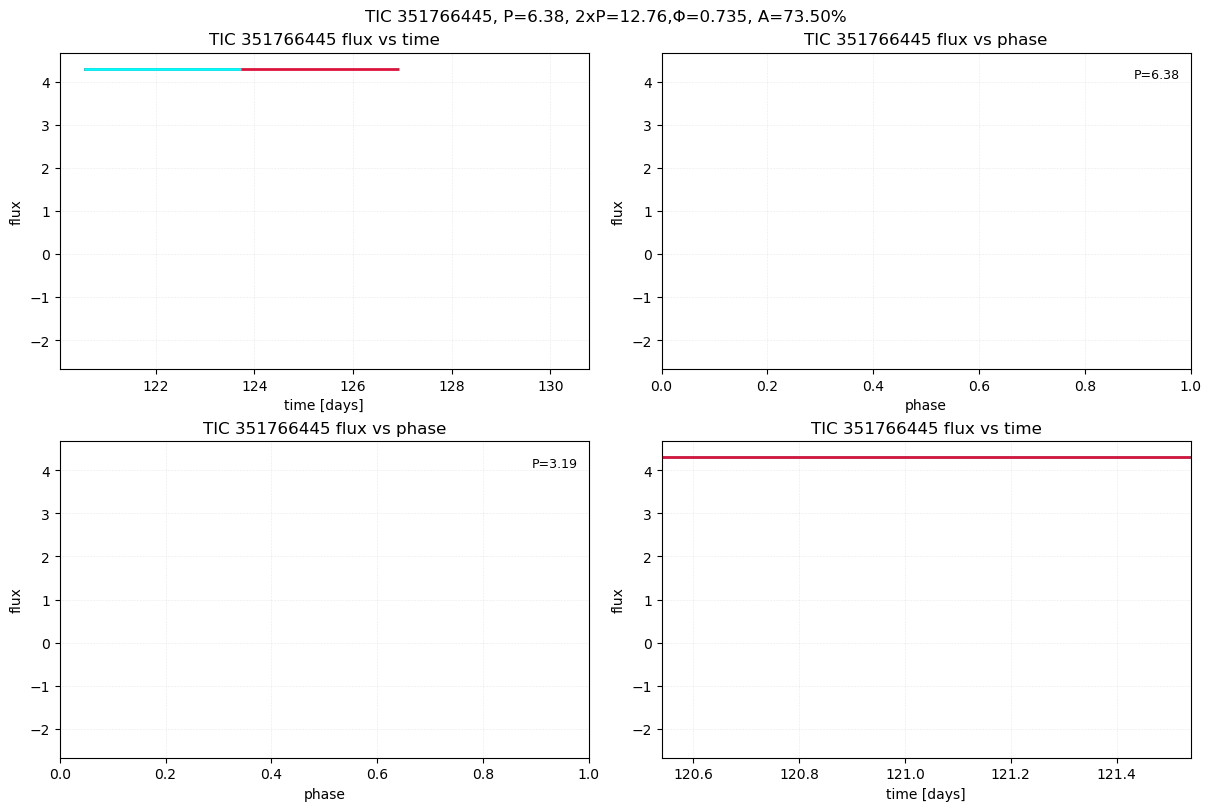


Processing target 2/5: Kepler-1445 b
TIC ID: TIC 351766604, Search term: TIC 351766604
Found 18 quarters of Kepler data
✓ Successfully downloaded Kepler lightcurve
  Time span: 120.5 - 130.2 days
  Data points: 473
  Clean time data points: [120.53978906 120.5602234  120.58065765 120.60109209 120.62152643
 120.64196067 120.66239501 120.68282946 120.7032637  120.72369804
 120.74413248 120.76456672 120.78500107 120.80543541 120.82586975
 120.84630409 120.86673843 120.88717287 120.90760711 120.92804145
 120.94847589 120.96891014 120.98934448 121.00977872 121.03021316
 121.0506475  121.07108184 121.09151618 121.11195052 121.13238486
 121.1528191  121.17325354 121.19368788 121.21412212 121.23455655
 121.25499089 121.27542513 121.29585947 121.31629391 121.33672825
 121.35716249 121.37759693 121.39803127 121.4184655  121.43889984
 121.45933428 121.47976852 121.50020286 121.52063719 121.54107163
 121.56150597 121.58194021 121.60237464 121.62280898 121.64324322
 121.66367756 121.68411199 121.7

c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


  Clean flux data points: [148404.73 148398.61 148399.58 148409.84 148390.31 148411.84 148391.62
 148404.7  148392.58 148409.88 148407.34 148393.95 148409.9  148419.22
 148397.64 148381.86 148397.92 148388.69 148401.7  148423.03 148412.48
 148411.36 148414.69 148424.19 148394.02 148400.77 148415.9  148452.61
 148411.84 148431.1  148384.42 148404.69 148422.17 148402.72 148413.47
 148412.02 148404.25 148420.03 148425.66 148415.28 148400.98 148434.16
 148406.77 148430.6  148420.06 148430.73 148379.47 148413.44 148419.28
 148435.12 148439.56 148401.08 148420.73 148401.7  148416.69 148417.02
 148422.06 148431.66 148447.97 148438.97 148408.89 148440.47 148421.6
 148416.97 148411.52 148394.06 148415.56 148427.42 148433.97 148400.28
 148412.61 148415.16 148416.31 148424.64 148428.77 148421.27 148397.23
 148414.17 148404.73 148427.14 148431.31 148445.48 148422.28 148407.16
 148429.19 148429.75 148397.84 148424.67 148427.6  148424.45 148402.72
 148403.27 148426.5  148393.6  148406.27 148425.48 1

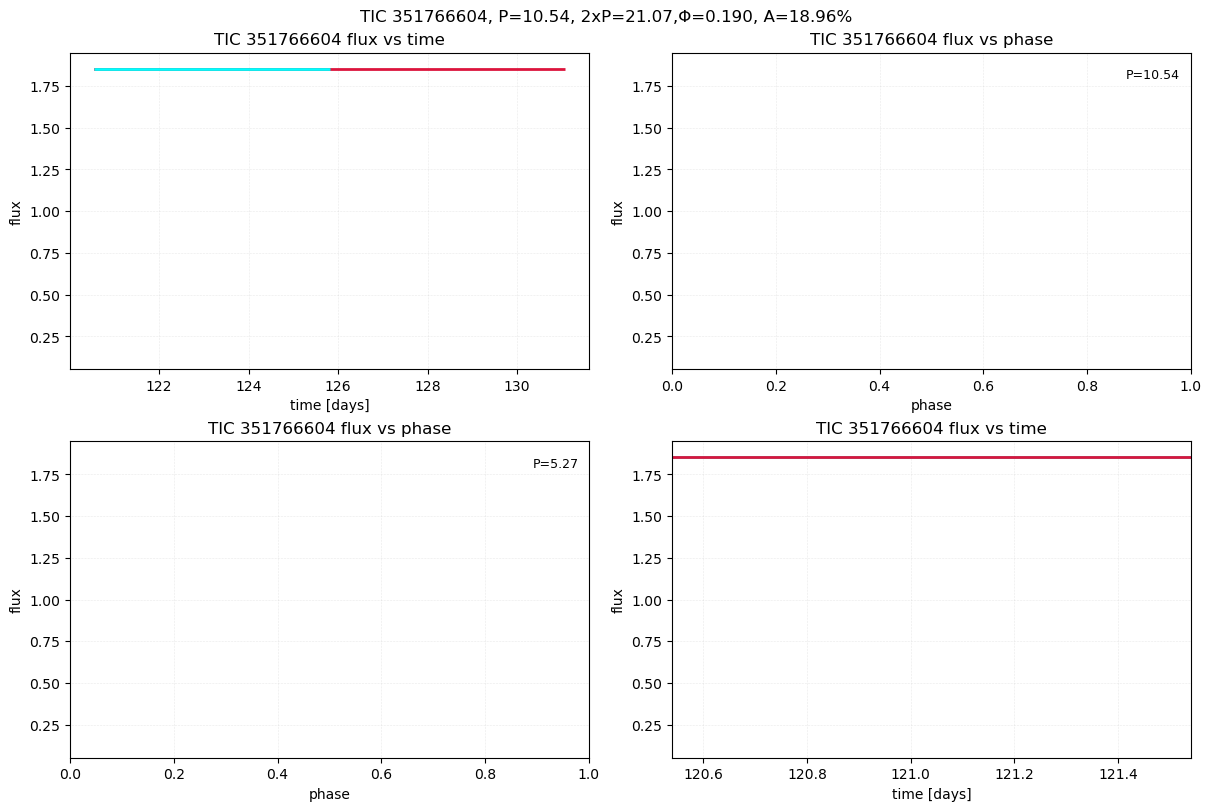


Processing target 3/5: Kepler-1286 b
TIC ID: TIC 351766517, Search term: TIC 351766517
Found 9 quarters of Kepler data
✓ Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean time data points: [131.51301737 131.53345175 131.55388603 ... 164.94325559 164.96368945
 164.98412341]
  Clean flux data points: [11251.106 11256.095 11254.514 ... 11245.176 11252.992 11241.3  ]
  Clean data points: 1624
Amplitude (A): 0.09


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


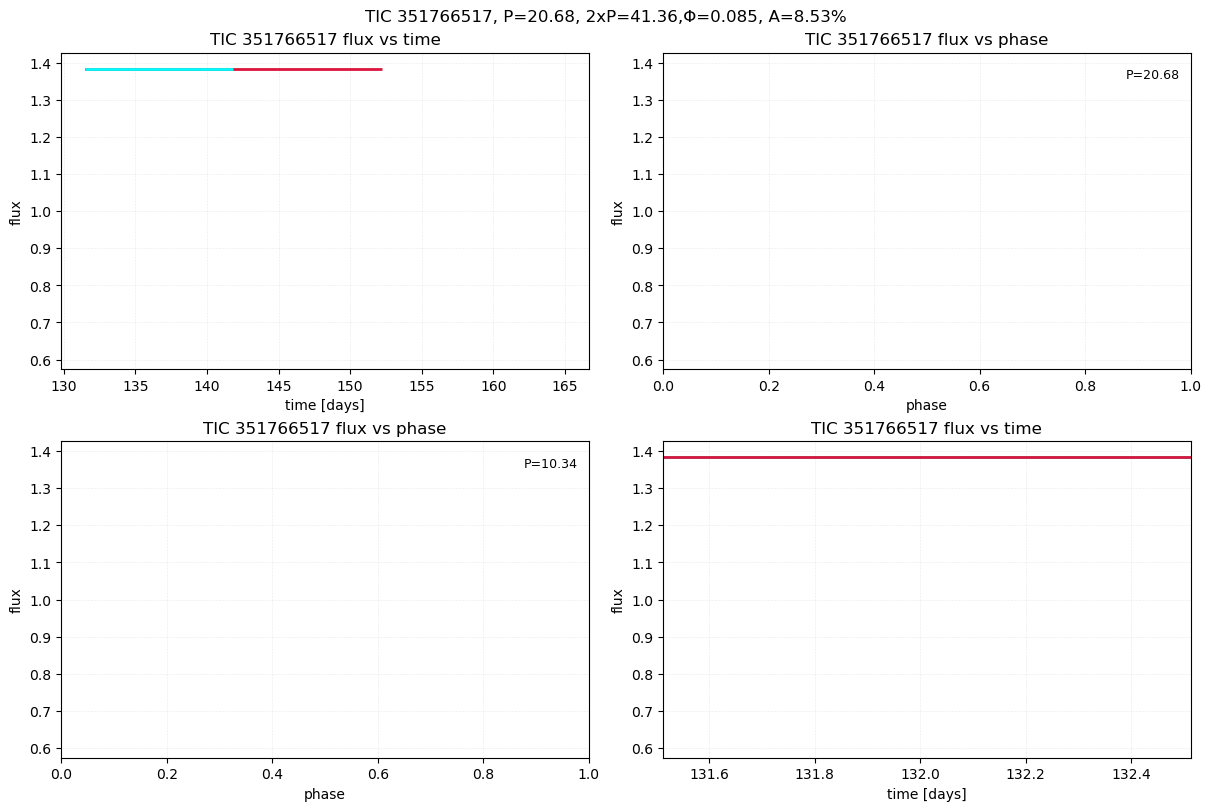


Processing target 4/5: Kepler-1835 b
TIC ID: TIC 351799800, Search term: TIC 351799800
Found 9 quarters of Kepler data
✓ Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean time data points: [131.51300451 131.53343889 131.55387316 ... 164.94324042 164.96367428
 164.98410825]
  Clean flux data points: [9424.955 9420.907 9415.961 ... 9420.301 9413.299 9423.916]
  Clean data points: 1624
Amplitude (A): 0.08


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


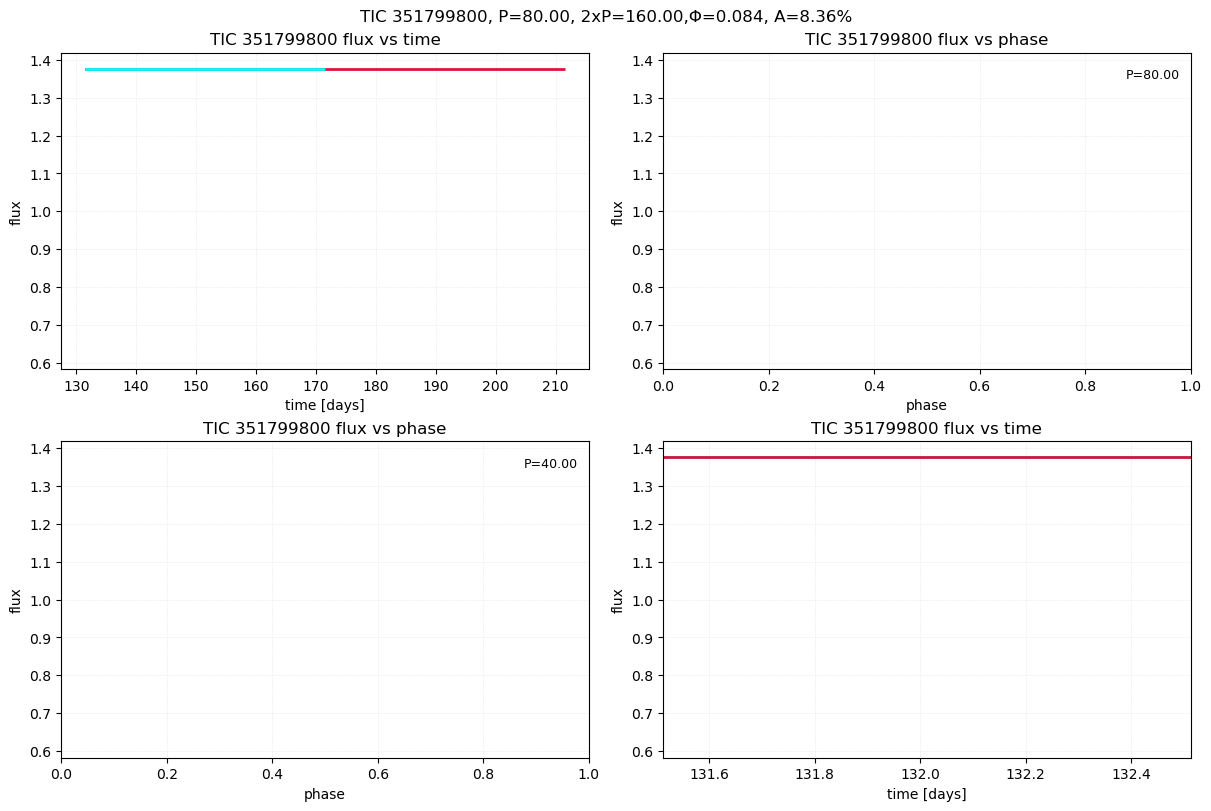


Processing target 5/5: Kepler-1341 b
TIC ID: TIC 123126460, Search term: TIC 123126460
Found 17 quarters of Kepler data
✓ Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean time data points: [131.51298215 131.53341653 131.5538508  ... 164.94321962 164.96365349
 164.98408746]
  Clean flux data points: [13205.33  13194.838 13198.434 ... 13260.234 13267.386 13266.365]
  Clean data points: 1624
Amplitude (A): 0.84


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


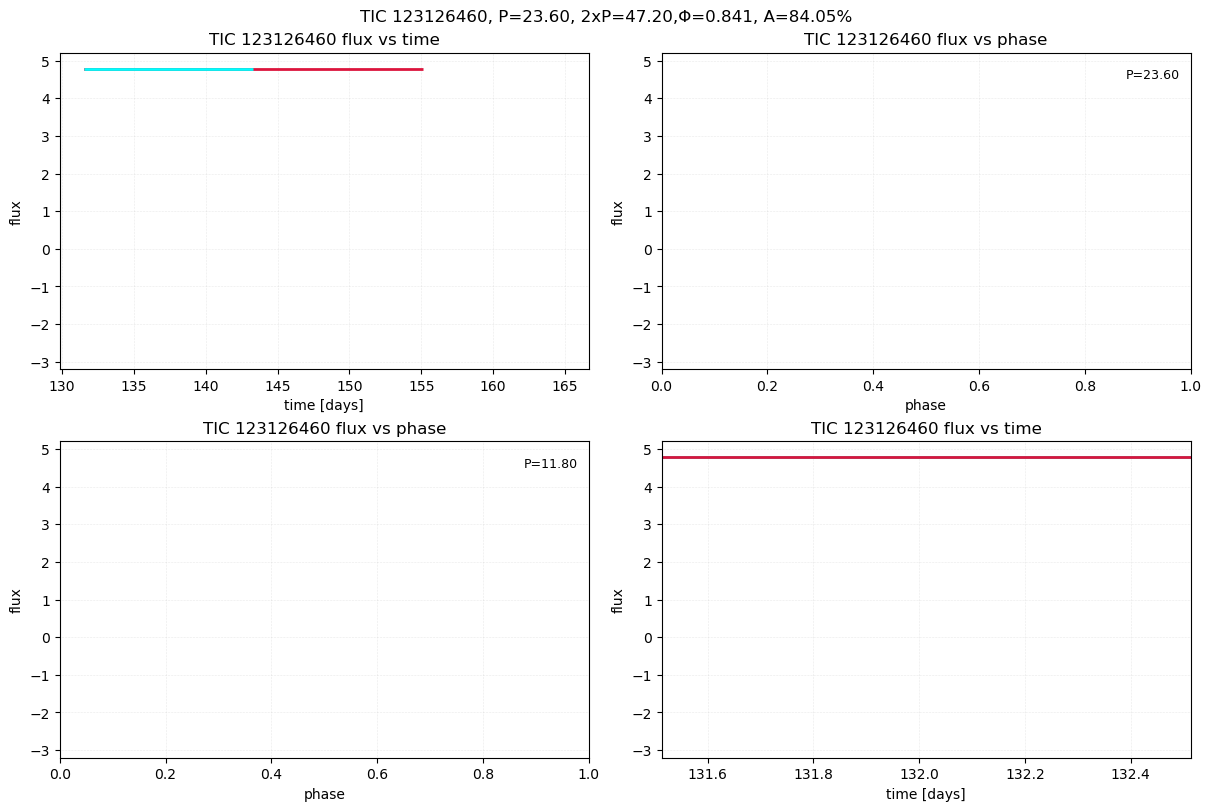

In [ ]:
def _bin_series_fixed_width(x, y, width):
    if not np.isfinite(width) or width <= 0:
        return np.array([]), np.array([])
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    x_min = np.nanmin(x_valid)
    x_max = np.nanmax(x_valid)
    if not np.isfinite(x_min) or not np.isfinite(x_max):
        return np.array([]), np.array([])
    if x_min == x_max:
        edges = np.array([x_min, x_min + width])
    else:
        edges = np.arange(x_min, x_max + width, width)
        if edges.size < 2:
            edges = np.array([x_min, x_max])
    return _bin_series_by_edges(x_valid, y_valid, edges)

def _bin_series_by_edges(x, y, edges):
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    inds = np.digitize(x_valid, edges) - 1
    valid = (inds >= 0) & (inds < len(edges) - 1)
    if not valid.any():
        return np.array([]), np.array([])
    x_valid = x_valid[valid]
    y_valid = y_valid[valid]
    inds = inds[valid]
    centers = []
    values = []
    for idx in np.unique(inds):
        bin_mask = inds == idx
        if np.any(bin_mask):
            centers.append(0.5 * (edges[idx] + edges[idx + 1]))
            values.append(np.nanmean(y_valid[bin_mask]))
    return np.array(centers), np.array(values)


for i, row in kepler_star_df.iterrows():
    target_name = row['target_name'] 
    search_term = row['search_term']
    tic_id = row['tic_id']
        
    print(f"\n{'='*50}")
    print(f"Processing target {i+1}/{len(kepler_star_df)}: {target_name}")
    print(f"TIC ID: {tic_id}, Search term: {search_term}")
    
    # Initialize variables in case of errors
    peak_period = 1.0  # Default period
    peak_power = 0.1   # Default power
    time = np.array([])
    flux = np.array([])
    
    kepler_search = lk.search_lightcurve(search_term, author='Kepler')
            
    # Process Kepler data first if available
    if len(kepler_search) > 0:
        print(f"Found {len(kepler_search)} quarters of Kepler data")
        
        # Download first quarter only to keep it fast
        lc = kepler_search.download()
        
        if lc is not None:
            mission_name = 'Kepler'
            print(f"✓ Successfully downloaded Kepler lightcurve")
            print(f"  Time span: {lc.time.min().value:.1f} - {lc.time.max().value:.1f} days")
            print(f"  Data points: {len(lc.time)}")

            # Extract time and flux
            time = lc.time.value if hasattr(lc.time, "value") else np.asarray(lc.time)
            flux = lc.flux.value if hasattr(lc.flux, "value") else np.asarray(lc.flux)

            # Normalize flux (convert to relative flux)
            flux_median = np.nanmedian(flux)
            flux = flux / flux_median  # Now centered around 1.0

            # remove NaNs / infinities
            mask = np.isfinite(time) & np.isfinite(flux)
            time = time[mask]
            flux = flux[mask]
            
            print(f"  Clean data points: {len(time)}")
            print(f"  Flux range: {np.nanmin(flux):.4f} to {np.nanmax(flux):.4f}")

            if len(time) > 100:  #get enough points for analysis
                # Lomb-Scargle analysis
                freq, power = LombScargle(time, flux).autopower(
                    minimum_frequency=1/80, maximum_frequency=10
                )

                #find peak
                peak_freq = freq[np.argmax(power)]
                peak_period = 1/peak_freq
                peak_power = np.max(power)
                
                print(f"  ✓ Period analysis complete:")
                print(f"    Peak period: {peak_period:.4f} days")
                print(f"    Peak power: {peak_power:.4f}")
            else:
                print(f"  ❌ Not enough clean data points ({len(time)})")
        else:
            print(f"  ❌ Failed to download Kepler data")
    else:
        print(f"  ❌ No Kepler data found")
        continue  # Skip to next target
        
    # Only plot if we have data
    if len(time) == 0 or len(flux) == 0:
        print(f"  ❌ No data to plot for {target_name}")
        continue
    
    # Create the plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
    ax_time = axes[0, 0]
    ax_phase = axes[0, 1]
    ax_two_phase = axes[1, 0]
    ax_zoom = axes[1, 1]
    
    # Calculate amplitude from flux variation
    amp = np.std(flux) if len(flux) > 0 else 0.01
    print(f"Amplitude (A): {amp:.4f}")

    def _get_flux_ylim(best_amp_val, flux_vals):
        if len(flux_vals) == 0:
            return (0.98, 1.02)
        finite_flux = flux_vals[np.isfinite(flux_vals)]
        if finite_flux.size:
            f_med = np.nanmedian(finite_flux)
            f_std = np.nanstd(finite_flux)
            if not np.isfinite(f_std) or f_std == 0:
                f_std = 0.01
            return (f_med - 3 * f_std, f_med + 3 * f_std)
        return (0.98, 1.02)
    
    # Plot 1: Time series
    ax_time.scatter(time, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_time.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_time.set_xlabel("time [days]")
    ax_time.set_ylabel("relative flux")
    ax_time.set_title(f"{tic_id} flux vs time")
    ax_time.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ylims_time = _get_flux_ylim(amp, flux)
    ax_time.set_ylim(ylims_time)

    # Plot 2: Phase folded at detected period
    period = peak_period
    ylims_phase = _get_flux_ylim(amp, flux)
    if np.isfinite(period) and period > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period) / period
        ax_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_phase.set_xlim(0, 1)
        ax_phase.text(
            0.98,
            0.95,
            f"P={period:.2f}",
            transform=ax_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        ax_phase.set_ylim(ylims_phase)
        
        # Add period indicator line to time plot
        if ylims_time:
            y_line = ylims_time[1] - 0.05 * (ylims_time[1] - ylims_time[0])
            x_start = np.nanmin(time)
            x_end = x_start + period
            ax_time.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2, zorder=5)
    else:
        ax_phase.text(
            0.5,
            0.5,
            "No valid period",
            ha="center",
            va="center",
            transform=ax_phase.transAxes,
        )
        ax_phase.set_ylim(ylims_phase)
    ax_phase.set_xlabel("phase")
    ax_phase.set_ylabel("relative flux")
    ax_phase.set_title(f"{tic_id} flux vs phase")
    ax_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    # Plot 3: Phase folded at half period (to check for double period)
    period_half = 0.5 * peak_period
    if np.isfinite(period_half) and period_half > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period_half) / period_half
        ax_two_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_two_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_two_phase.set_xlim(0, 1)
        ax_two_phase.text(
            0.98,
            0.95,
            f"P/2={period_half:.2f}",
            transform=ax_two_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        ax_two_phase.set_ylim(ylims_phase)

        # Add half-period indicator line to time plot
        if ylims_time:
            y_line = ylims_time[1] - 0.1 * (ylims_time[1] - ylims_time[0])
            x_start = np.nanmin(time)
            x_end = x_start + period_half
            ax_time.hlines(y_line, x_start, x_end, colors="cyan", linewidth=2, zorder=4)
    else:
        ax_two_phase.text(
            0.5,
            0.5,
            "No valid half period",
            ha="center",
            va="center",
            transform=ax_two_phase.transAxes,
        )
        ax_two_phase.set_ylim(ylims_phase)
    ax_two_phase.set_xlabel("phase")
    ax_two_phase.set_ylabel("relative flux")
    ax_two_phase.set_title(f"{tic_id} flux vs phase (P/2)")
    ax_two_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    # Plot 4: Zoomed time series (first day)
    ax_zoom.scatter(time, flux, s=2, color="0.7", alpha=1, edgecolor="none")
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_zoom.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_zoom.set_xlabel("time [days]")
    ax_zoom.set_ylabel("relative flux")
    ax_zoom.set_title(f"{tic_id} flux vs time (zoomed)")
    ax_zoom.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ax_zoom.set_ylim(ylims_time)
    
    # Set zoom window to first few days
    if len(time) > 0:
        t_start = np.nanmin(time)
        zoom_window = min(5.0, (np.nanmax(time) - t_start) * 0.1)  # 5 days or 10% of data
        ax_zoom.set_xlim(t_start, t_start + zoom_window)

        # Add period indicators in the zoom window
        if ylims_time and np.isfinite(peak_period):
            y_line = ylims_time[0] + 0.05 * (ylims_time[1] - ylims_time[0])
            
            # Show one full period
            x_start = t_start + 0.5
            x_end = x_start + peak_period
            if x_end <= t_start + zoom_window:
                ax_zoom.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2, label=f"P={peak_period:.2f}d")
            
            # Show half period
            x_end_half = x_start + 0.5 * peak_period
            if x_end_half <= t_start + zoom_window:
                ax_zoom.hlines(y_line - 0.02 * (ylims_time[1] - ylims_time[0]), x_start, x_end_half, colors="cyan", linewidth=2, label=f"P/2={0.5*peak_period:.2f}d")
    
    # Add overall title and save
    fig.suptitle(
        f"{tic_id}: P={peak_period:.3f}d, Power={peak_power:.3f}, A={amp * 100:.2f}%",
        fontsize=12,
    )

    plt.savefig(f'C:/Users/smithlt/Documents/ASTR502/vetted_plot_{tic_id}.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()